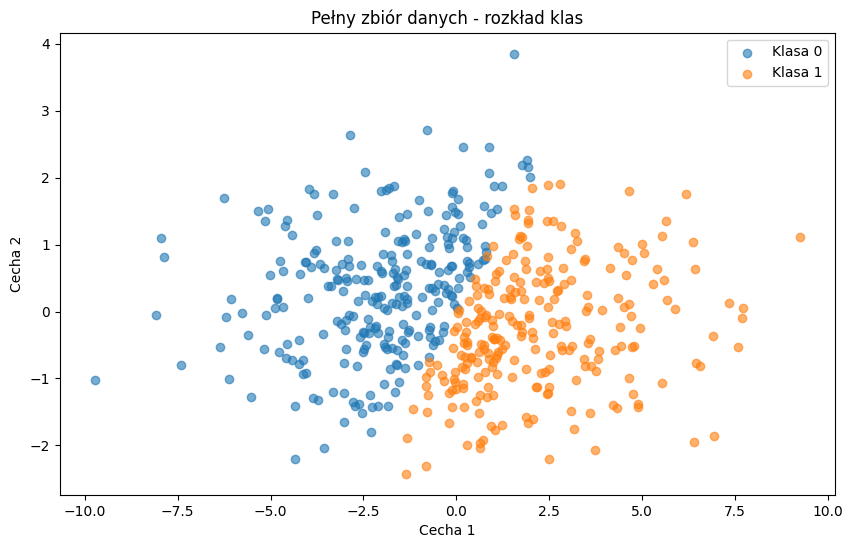

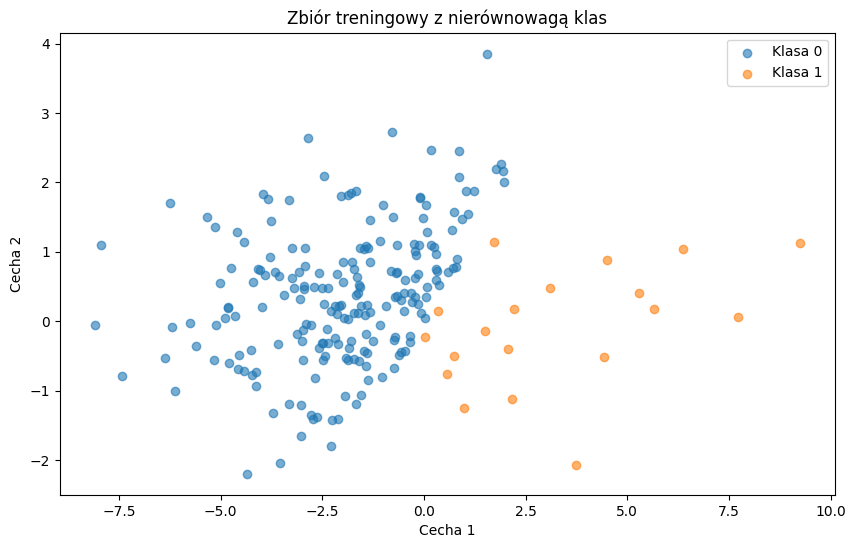

Rozkład klas w zbiorze treningowym: [204  19]

1. Model bazowy (pełne dane treningowe):
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.94      0.97        49

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

ROC-AUC: 1.0000
------------------------------------------------------------

2. Model bez balansowania:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        51
           1       1.00      0.67      0.80        49

    accuracy                           0.84       100
   macro avg       0.88      0.84      0.83       100
weighted avg       0.88      0.84      0.84       100

ROC-AUC: 1.0000
------------------------------------------------------------

3. Model z wagami klas:
              precision    recall  f1-score   suppo

In [1]:
# Komórka 1 - Konfiguracja środowiska
%matplotlib inline
%pip install imbalanced-learn

# Komórka 2 - Import bibliotek
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Komórka 3 - Generowanie i wizualizacja danych
np.random.seed(42)
X = np.random.randn(500, 2) * [3, 1]
y = (X[:, 0] > X[:, 1]).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Klasa 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Klasa 1', alpha=0.6)
plt.title('Pełny zbiór danych - rozkład klas')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()

# Komórka 4 - Podział danych i tworzenie nierównowagi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Tworzenie nierównowagi klasowej (10% klasy 1)
class_0 = np.where(y_train == 0)[0]
class_1 = np.where(y_train == 1)[0]
n_keep_class1 = int(0.1 * len(class_1))
keep_class1 = np.random.choice(class_1, size=n_keep_class1, replace=False)

imbalanced_indices = np.concatenate([class_0, keep_class1])
X_train_imbal = X_train[imbalanced_indices]
y_train_imbal = y_train[imbalanced_indices]

# Wizualizacja zbioru treningowego
plt.figure(figsize=(10, 6))
plt.scatter(X_train_imbal[y_train_imbal == 0][:, 0],
            X_train_imbal[y_train_imbal == 0][:, 1],
            label='Klasa 0', alpha=0.6)
plt.scatter(X_train_imbal[y_train_imbal == 1][:, 0],
            X_train_imbal[y_train_imbal == 1][:, 1],
            label='Klasa 1', alpha=0.6)
plt.title('Zbiór treningowy z nierównowagą klas')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.show()

print("Rozkład klas w zbiorze treningowym:", np.bincount(y_train_imbal))

# Komórka 5 - Funkcja ewaluacyjna
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("-" * 60)

# Komórka 6 - Eksperymenty z różnymi metodami
# Model bazowy (zrównoważony)
print("\n1. Model bazowy (pełne dane treningowe):")
model_baseline = LogisticRegression(random_state=42)
model_baseline.fit(X_train, y_train)
evaluate_model(model_baseline, X_test, y_test)

# Model bez balansowania
print("\n2. Model bez balansowania:")
model_imbalanced = LogisticRegression(random_state=42)
model_imbalanced.fit(X_train_imbal, y_train_imbal)
evaluate_model(model_imbalanced, X_test, y_test)

# Wagi klas
print("\n3. Model z wagami klas:")
model_weights = LogisticRegression(class_weight='balanced', random_state=42)
model_weights.fit(X_train_imbal, y_train_imbal)
evaluate_model(model_weights, X_test, y_test)

# SMOTE
print("\n4. Model z SMOTE:")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_imbal, y_train_imbal)
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_smote, y_smote)
evaluate_model(model_smote, X_test, y_test)

# Undersampling
print("\n5. Model z undersamplingiem:")
under = RandomUnderSampler(random_state=42)
X_under, y_under = under.fit_resample(X_train_imbal, y_train_imbal)
model_under = LogisticRegression(random_state=42)
model_under.fit(X_under, y_under)
evaluate_model(model_under, X_test, y_test)